In [2]:
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from PIL import Image
import timeit

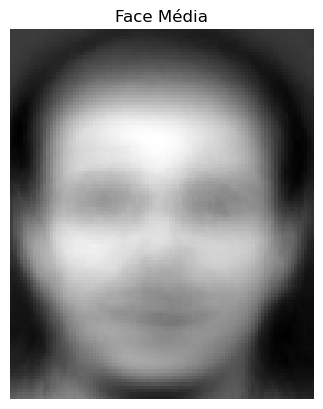

In [18]:
# caminhos para os diretórios contendo as imagens
paths = ["./kaggle/input/att-database-of-faces/s" + str(i) for i in range(1, 41)]

# inicializando o array para armazenar as imagens e os rótulos
Data = np.zeros((400, 10304))  # Assumindo que cada imagem tem 92x112 pixels
labels = np.zeros((400, 1))
cnt = 0

# função para carregar imagens e calcular a média
def media_s(arr):
    soma = 0
    contagem = 0
    for elemento in arr:
        soma += elemento
        contagem += 1
    media = soma / contagem if contagem != 0 else 0
    return media

# carregar as imagens e os rótulos
for i in range(40):
    labels[i * 10 : (i + 1) * 10] = i + 1
    path = paths[i]
    files = os.listdir(path)
    for file in files:
        img = Image.open(os.path.join(path, file)).convert('L')  # Converte para escala de cinza
        np_img = np.array(img).flatten()
        Data[cnt] = np_img
        cnt += 1

# calcular a face média utilizando media_s
mean_face_vector = np.apply_along_axis(media_s, 0, Data)
mean_face_image = mean_face_vector.reshape(112, 92)  # Redimensiona para o formato original

def display_image(image, title='Image'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Mostrar a face média
display_image(mean_face_image, title='Face Média')